In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
from scipy import optimize

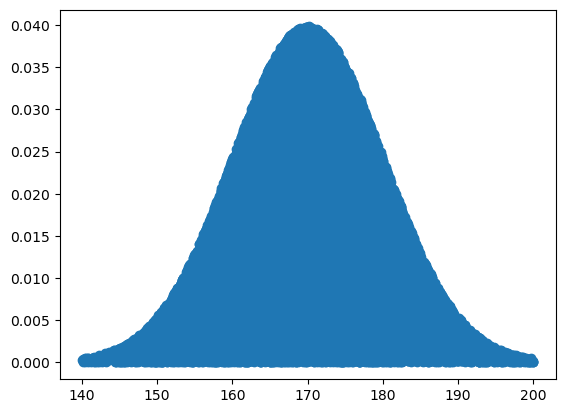

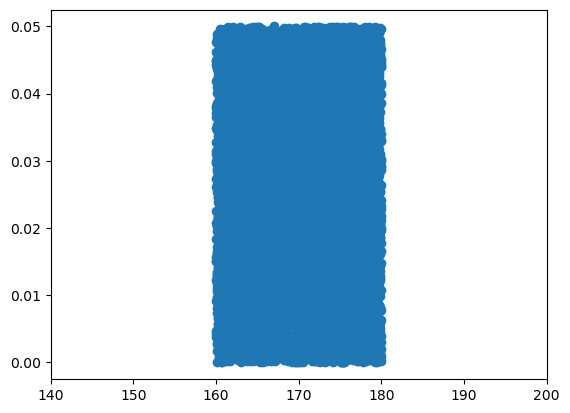

In [2]:
#Generating the distributions:
def distribution_generator(func,res,x_min,x_max,y_min,y_max):
    x_array = np.random.uniform(low=x_min,high=x_max,size=(res,))
    y_array = np.random.uniform(low=y_min,high=y_max,size=(res,))
    x_accepted = np.zeros(res)
    y_accepted = np.zeros(res)
    Counter = 0
    for i in range(res):
        y_test = func(x_array[i])
        if y_array[i] <= y_test:
            x_accepted[Counter] = x_array[i]
            y_accepted[Counter] = y_array[i]
            Counter +=1
    x_accepted = x_accepted[:Counter]
    y_accepted = y_accepted[:Counter]
    return(x_accepted,y_accepted)
def gaußfunc(x):
    y = np.exp((-0.5)*((x-170)**2)/(10**2))/(10*np.sqrt(2*np.pi))
    return y
def uniform(x):
    if np.abs(x-170)<=10:
        return 1/20
    else:
        return 0

#Using the functions to generate the distributions
x_gauß,y_gauß = distribution_generator(func=gaußfunc,res=1000000,x_min=140,x_max=200,y_min=0,y_max=0.5)
x_uni,y_uni = distribution_generator(func=uniform,res=1000000,x_min=140,x_max=200,y_min=0,y_max=2)

#Sanity check
plt.scatter(x_gauß,y_gauß)
plt.show()
plt.scatter(x_uni,y_uni)
plt.xlim(140,200)
plt.show()

In [3]:
def geometric(array):
    prod = 1
    for i in array:
        prod *= i
    return prod**(1/(len(array)))

N = 10000
mean_gauß = np.ones(N)
mean_uni = np.ones(N)
med_gauß = np.ones(N)
med_uni = np.ones(N)
geom_gauß = np.ones(N)
geom_uni = np.ones(N)
mode_gauß = np.ones(N)
mode_uni = np.ones(N)

for i in range(N):
    gauß_sample = np.random.choice(x_gauß,size=10)
    uni_sample = np.random.choice(x_uni,size=10)
    
    #mean
    mean_gauß[i] = np.mean(gauß_sample)
    mean_uni[i] = np.mean(uni_sample)
    #median
    med_gauß[i] = np.median(gauß_sample)
    med_uni[i] = np.median(uni_sample)
    #geometric mean
    geom_gauß[i] = geometric(gauß_sample)
    geom_uni[i] = geometric(uni_sample)
    #mode?
    mode_gauß[i] = st.mode(np.round(gauß_sample))[0][0]
    mode_uni[i] = st.mode(np.round(uni_sample))[0][0]
    
#bias = np.mean(whatever)- 170
#varaince = np.var(wahtever)
print("For the Gaußian distribution:")
print(f"The mean as an estimator yields a bias of b={np.round(np.mean(mean_gauß)-170,decimals = 2)} and a variance of V={np.round(np.var(mean_gauß),decimals = 2)}")
print(f"The median as an estimator yields a bias of b={np.round(np.mean(med_gauß)-170,decimals = 2)} and a variance of V={np.round(np.var(med_gauß),decimals = 2)} ")
print(f"The geometric mean as an estimator yields a bias of b={np.round(np.mean(geom_gauß)-170,decimals = 2)} and a variance of V={np.round(np.var(geom_gauß),decimals = 2)}")
print(f"The mode as an estimator yields a bias of b={np.round(np.mean(mode_gauß)-170,decimals = 2)} and a variance of V={np.round(np.var(mode_gauß),decimals = 2)}")
print("-----------------------------------------------------------------------------")
print("For the uniform distribution:")
print(f"The mean as an estimator yields a bias of b={np.round(np.mean(mean_uni)-170,decimals = 2)} and a variance of V={np.round(np.var(mean_uni),decimals = 2)}")
print(f"The median as an estimator yields a bias of b={np.round(np.mean(med_uni)-170,decimals = 2)} and a variance of V={np.round(np.var(med_uni),decimals = 2)} ")
print(f"The geometric mean as an estimator yields a bias of b={np.round(np.mean(geom_uni)-170,decimals = 2)} and a variance of V={np.round(np.var(geom_uni),decimals = 2)}")
print(f"The mode as an estimator yields a bias of b={np.round(np.mean(mode_uni)-170,decimals = 2)} and a variance of V={np.round(np.var(mode_uni),decimals = 2)}")


C:\Users\Konka\AppData\Local\Temp\ipykernel_2196\1057817085.py:31: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_gauß[i] = st.mode(np.round(gauß_sample))[0][0]
C:\Users\Konka\AppData\Local\Temp\ipykernel_2196\1057817085.py:32: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid th

For the Gaußian distribution:
The mean as an estimator yields a bias of b=0.04 and a variance of V=9.62
The median as an estimator yields a bias of b=0.1 and a variance of V=13.74 
The geometric mean as an estimator yields a bias of b=-0.22 and a variance of V=9.68
The mode as an estimator yields a bias of b=-5.22 and a variance of V=88.67
-----------------------------------------------------------------------------
For the uniform distribution:
The mean as an estimator yields a bias of b=-0.07 and a variance of V=3.33
The median as an estimator yields a bias of b=-0.1 and a variance of V=7.56 
The geometric mean as an estimator yields a bias of b=-0.16 and a variance of V=3.33
The mode as an estimator yields a bias of b=-2.54 and a variance of V=30.9


Exercize 2.)
a)
With $$\chi^2 = \Sigma_{i=0}^{n}\frac{(y_i-f(x_i))^2}{\sigma_y^2}; f(x)=ax+b$$ find the estimator $\hat{a}$ for $a$, so:
$$ \frac{\partial\chi^2}{\partial a} = 0$$
$$\Rightarrow 0 = \Sigma(ax_i^2 + x_i(b-y_i))$$
$$\Rightarrow \hat{a} = \frac{<xy>-b<x>}{<x^2>} $$
Analog to that:
$$\frac{\partial\chi^2}{\partial b} = 0$$
$$\Rightarrow \hat{b} = <y>-\hat{a}<x> $$
That yields for $\hat{a}$:
$$ \hat{a} = \frac{<xy>-<x><y>}{<x^2>-<x>^2} = \frac{CoV(x,y)}{Var(x)} $$

In [4]:
#b)
#Simulate the experiment:
# for f(x) = ax+b
#getting x from a uniform distribution between 0 and 1:
a,b,n,sig = 0.5,1,10,0.05

x_array = np.random.uniform(low=0,high=1,size=(1000000,))
y_array = np.ones(n)
#getting an y-error from a gaußian distribution:
def gaußfunc_2(x):
    y = np.exp((-0.5)*((x)**2)/(sig**2))/(sig*np.sqrt(2*np.pi))
    return y
x_gauß_2,y_gauß_2 = distribution_generator(func=gaußfunc_2,res=1000000,x_min=-1,x_max=1,y_min=0,y_max=10)
x_gauß_3,y_gauß_3 = distribution_generator(func=gaußfunc_2,res=1000000,x_min=-1,x_max=1,y_min=0,y_max=10)
#for the last: plot the data points and the fit

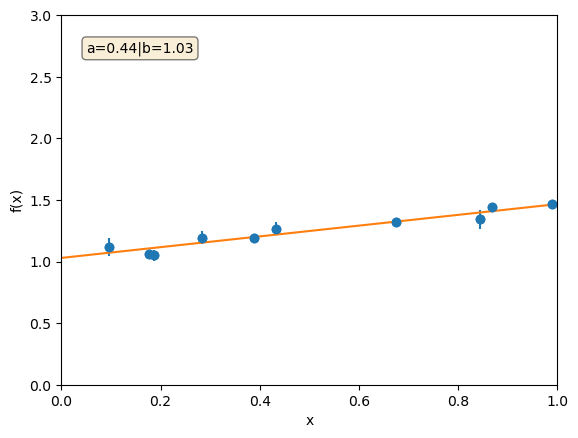

The bias for the estimator a is: bias(a)=0.0037
The bias for the estimator b is: bias(b)=-0.0009
It seems that the estimators are not biased


In [5]:
def fitfunction(x,a,b):
    y = x*a+b
    return y
a_est_array = np.ones(1000)
b_est_array = np.ones(1000) 
for i in range(1000):
    x_sample = np.random.choice(x_array,n)
    y_array = x_sample*a+b
    error_sample = np.random.choice(x_gauß_2,n)
    y_sample = y_array + error_sample
    
    a_fit,b_fit =  optimize.curve_fit(fitfunction,x_sample,y_sample)[0]
    a_est_array[i] = a_fit
    b_est_array[i] = b_fit
plt.scatter(x_sample,y_sample)
x_plot = np.linspace(0,1,10000) 
y_plot = x_plot*a_fit + b_fit
plt.errorbar(x_sample,y_sample,yerr = np.abs(error_sample), fmt = "o")
plt.plot(x_plot,y_plot)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.xlim(0,1)
plt.ylim(0,3)
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
plt.text(0.05, 2.7,f"a={np.round(a_fit,decimals = 2)}|b={np.round(b_fit,decimals = 2)}", bbox=props)
plt.show()
#c)
print(f"The bias for the estimator a is: bias(a)={np.round(np.mean(a_est_array)-a,decimals=4)}") 
print(f"The bias for the estimator b is: bias(b)={np.round(np.mean(b_est_array)-b,decimals=4)}")
print("It seems that the estimators are not biased")

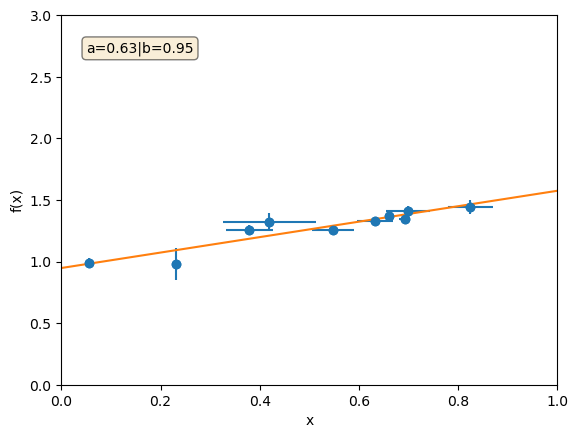

In [6]:
#d)
for i in range(1000):
    x_sample = np.random.choice(x_array,n)
    y_array = x_sample*a+b
    error_sample_1 = np.random.choice(x_gauß_2,n)
    error_sample_2 = np.random.choice(x_gauß_3,n)
    x_sample = x_sample + error_sample_1
    y_sample = y_array + error_sample_2
    
    a_fit,b_fit =  optimize.curve_fit(fitfunction,x_sample,y_sample)[0]
    a_est_array[i] = a_fit
    b_est_array[i] = b_fit

plt.scatter(x_sample,y_sample)
x_plot = np.linspace(0,1,10000) 
y_plot = x_plot*a_fit + b_fit
plt.errorbar(x_sample,y_sample,xerr = np.abs(error_sample_1), yerr = np.abs(error_sample_2), fmt = "o")
plt.plot(x_plot,y_plot)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.xlim(0,1)
plt.ylim(0,3)
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
plt.text(0.05, 2.7,f"a={np.round(a_fit,decimals = 2)}|b={np.round(b_fit,decimals = 2)}", bbox=props)
plt.show()

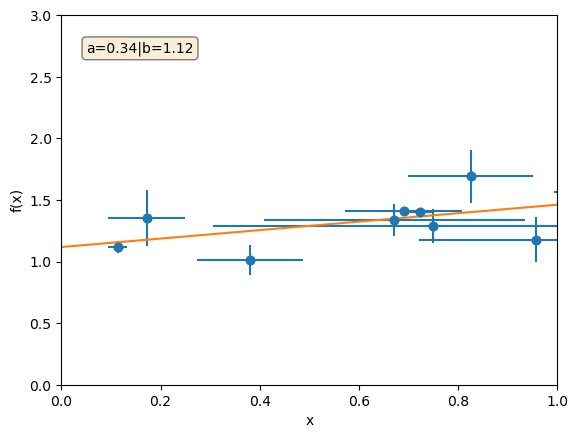

In [7]:
#e)
a,b,n,sig = 0.5,1,10,0.2

x_array = np.random.uniform(low=0,high=1,size=(1000000,))
y_array = np.ones(n)
#getting an y-error from a gaußian distribution:
def gaußfunc_3(x):
    y = np.exp((-0.5)*((x)**2)/(sig**2))/(sig*np.sqrt(2*np.pi))
    return y
x_gauß_4,y_gauß_4 = distribution_generator(func=gaußfunc_3,res=1000000,x_min=-1,x_max=1,y_min=0,y_max=10)
x_gauß_5,y_gauß_5 = distribution_generator(func=gaußfunc_3,res=1000000,x_min=-1,x_max=1,y_min=0,y_max=10)

for i in range(1000):
    x_sample = np.random.choice(x_array,n)
    y_array = x_sample*a+b
    error_sample_1 = np.random.choice(x_gauß_4,n)
    error_sample_2 = np.random.choice(x_gauß_5,n)
    x_sample = x_sample + error_sample_1
    y_sample = y_array + error_sample_2
    
    a_fit,b_fit =  optimize.curve_fit(fitfunction,x_sample,y_sample)[0]
    a_est_array[i] = a_fit
    b_est_array[i] = b_fit

plt.scatter(x_sample,y_sample)
x_plot = np.linspace(0,1,10000) 
y_plot = x_plot*a_fit + b_fit
plt.errorbar(x_sample,y_sample,xerr = np.abs(error_sample_1), yerr = np.abs(error_sample_2), fmt = "o")
plt.plot(x_plot,y_plot)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.xlim(0,1)
plt.ylim(0,3)
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
plt.text(0.05, 2.7,f"a={np.round(a_fit,decimals = 2)}|b={np.round(b_fit,decimals = 2)}", bbox=props)
plt.show()


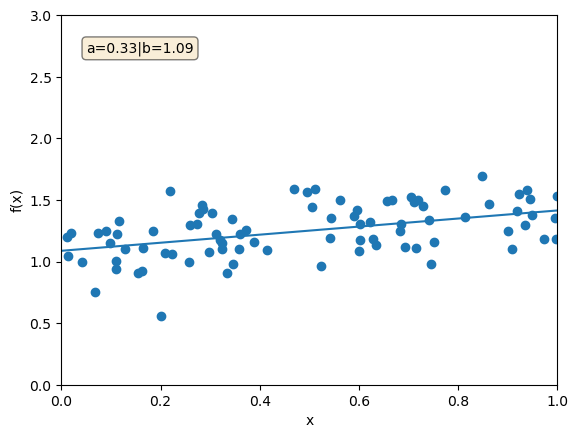

The bias for the estimator a is: bias(a)=-0.1565
The bias for the estimator b is: bias(b)=0.0796


In [8]:
a,b,n,sig = 0.5,1,100,0.2

x_array = np.random.uniform(low=0,high=1,size=(1000000,))
y_array = np.ones(n)
#getting an y-error from a gaußian distribution:
def gaußfunc_3(x):
    y = np.exp((-0.5)*((x)**2)/(sig**2))/(sig*np.sqrt(2*np.pi))
    return y
x_gauß_4,y_gauß_4 = distribution_generator(func=gaußfunc_3,res=1000000,x_min=-1,x_max=1,y_min=0,y_max=10)
x_gauß_5,y_gauß_5 = distribution_generator(func=gaußfunc_3,res=1000000,x_min=-1,x_max=1,y_min=0,y_max=10)

for i in range(1000):
    x_sample = np.random.choice(x_array,n)
    y_array = x_sample*a+b
    error_sample_1 = np.random.choice(x_gauß_4,n)
    error_sample_2 = np.random.choice(x_gauß_5,n)
    x_sample = x_sample + error_sample_1
    y_sample = y_array + error_sample_2
    
    a_fit,b_fit =  optimize.curve_fit(fitfunction,x_sample,y_sample)[0]
    a_est_array[i] = a_fit
    b_est_array[i] = b_fit

plt.scatter(x_sample,y_sample)
x_plot = np.linspace(0,1,10000) 
y_plot = x_plot*a_fit + b_fit
#plt.errorbar(x_sample,y_sample,xerr = np.abs(error_sample_1), yerr = np.abs(error_sample_2), fmt = "o")
plt.plot(x_plot,y_plot)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.xlim(0,1)
plt.ylim(0,3)
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
plt.text(0.05, 2.7,f"a={np.round(a_fit,decimals = 2)}|b={np.round(b_fit,decimals = 2)}", bbox=props)
plt.show()
print(f"The bias for the estimator a is: bias(a)={np.round(np.mean(a_est_array)-a,decimals=4)}") 
print(f"The bias for the estimator b is: bias(b)={np.round(np.mean(b_est_array)-b,decimals=4)}")